# MSDS 631 - Lecture 4 (February 13, 2019)

### Libraries

Coding has become powerful because of the kind of open sharing that allows the collective creativity and problem solving of a few to be disseminated to everyone. We are no longer forced to reinvent the wheel every single time we want to solve a problem. Each time someone solves something new and decides to make their code public, they are contributing to the collective knowledge-base of all coders of that language.

Consider the most frequently used library we've used to date: random. It's actually deceptively difficult to come up with truly random numbers. Some people figured out how to come pretty darn close to representing randomness and wrote a library. Now, I never have to think about writing a random number generator whenever I'm doing things.

In [2]:
# Let's import random
import random

Now, all of the capabilities of this library are at my fingertips.

In [3]:
random_integer = random.randint(1,100) # Random integer between 1 and 100 (inclusive)
random_integer

55

In [4]:
random_float = random.random() # Random float between 0 and 1
random_float

0.8785020665176015

In [5]:
random_float_big = random.random() * 100 # Random float between 0 and 100
random_float_big

31.496573246582315

In [6]:
random_normal = random.normalvariate(10,2) # Random from normal distribution with mean of 10 and sd of 1
random_normal

10.064924635847442

In [7]:
#datetime is another library I use a lot
from datetime import datetime as dt

In [8]:
def convert_to_date(date_str):
    date_obj = dt.strptime(date_str, '%Y-%m-%d')  #YYYY-MM-DD
    return date_obj

In [9]:
my_bday = convert_to_date("1979-03-08")

In [11]:
my_bday.year

1979

Now let's build our own library!

Open up Spyder and then open the file `people.py` in the Week 4 lecture folder.

In [12]:
import people

In [18]:
# Let's create an "instance" of an "Object" that we imported
jason = people.Person('Jason', 'Shu', 'Data Science', '1979-03-08')

In [19]:
jason.tell_me_a_story()

Jason was born on 1979-03-08 00:00:00, which was a 3. His major is Data Science


In [24]:
#jason.phrase ONLY exists if we "call" the method tell_me_a_story OR store_a_story
jason.phrase

'Jason was born on 1979-03-08 00:00:00, which was a 3. His major is Data Science'

#### Let's look at some attributes of me

In [25]:
#first_name is an attribute of the object person. In this case, "Jason" was assigned as its value
jason.first_name

'Jason'

In [26]:
#last_name is an attribute of the object person. In this case, "Jason" was assigned as its value
jason.last_name

'Shu'

In [28]:
#Attributes can only be added if they are part of the object
jason['favorite_sport'] = 'golf' #Since it's not built into the object, this doesn't work

TypeError: 'Person' object does not support item assignment

### Input / Output (IO)

#### Different Data Storage Formats
Data is at the heart of analysis, but it has to get to your computer *somehow*. Sometimes it comes from databases, but many data scientists use downloaded files and load them into their analysis tools.

Data is often labeled as either "structured" or "unstructured." Structured data is defined by the ability to "label" values with some sort of attribute. So given a group of students, I can find each of their majors or genders. Unstructured data would be something like text from a Yelp review or the noise signal of an audio recording. For our purposes, structured data is the only thing we are going to care about.

Structured data comes in a few major formats: 1) tabular, and 2) JSON-based
- Tabular data is what we are accustomed to seeing. Think about an excel file with rows and columns
- JSON-based data comes in either attribute–value pairs or arrays (or some combination of the two)

Tabular data is almost always stored via something called comma-separated value (csv) files. csv files differ from Excel files in that they are as bare-bones as you can get. Excel files carry all sorts of formatting, tabs, and other features that most computer programs can't understand. When you save excel files as csv's, everything is stripped away to only include data needed.

JSON-based data closely resemble Python dictionaries and lists. They are less "pretty" to look at but are infinitely flexible.

Let's take a look at some files.

`students.csv`<br>
`students.json`<br>
`by_gender_and_major.json`


Now let's open these files in Python to see how they look as a data structure.

#### CSVs

In [29]:
import csv

In [30]:
# Read a file
csv_data = []
with open('students.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_data.append(row)

In [31]:
# What data type is csv_data?
type(csv_data)

list

In [32]:
# What is the first row of data?
headers = csv_data[0]
headers

['student_id', 'first', 'last', 'gender', 'class', 'major', 'gpa']

In [33]:
# What is the second row of data?
csv_data[1]

['5a397209-3782-4764-a285-10fae807ee71',
 'Janis',
 'Brown',
 'Female',
 'Junior',
 'Economics',
 '3.12']

In [34]:
another_student = ['2bef3439-ef05-47cf-976e-cc13c6d5b7a5', 'Jason', 'Shu', 'Male', 'Senior', 'Data Science', 3.2]

In [35]:
csv_data.append(another_student)

Let's learn on our own how to write data

https://docs.python.org/3/library/csv.html

In [36]:
# Write your list to a new file
with open('students_1.csv', 'w') as f:
    writer = csv.writer(f) #writer is an Object within the library csv; we've also created an instance also called writer
    for row in csv_data:
        writer.writerow(row) #writerow takes a list and adds it to a file; a for-loop allows us to add all of our data

#### JSONs

In [46]:
import json

In [47]:
# Let's open a json file
with open('students.json', 'r') as f:
    json_data_1 = json.load(f)

In [48]:
# What type is json_data?
type(json_data_1) #JSONs can also hold Python dictionaries

list

In [49]:
len(json_data_1)

10000

In [50]:
json_data_1[0]

{'class': 'Junior',
 'first': 'Janis',
 'gender': 'Female',
 'gpa': 3.12,
 'last': 'Brown',
 'major': 'Economics',
 'student_id': '5a397209-3782-4764-a285-10fae807ee71'}

Let's find out all of the majors for our enrolled students.

In [52]:
all_majors = []
all_gpas = []
counter = 0
for student in json_data_1:
    all_majors.append(student['major'])
    all_gpas.append(student['gpa'])

In [53]:
all_majors[:10]

['Economics',
 'Economics',
 'Finance',
 'Math',
 'Finance',
 'Engineering',
 'Engineering',
 'Math',
 'Chemistry',
 'Finance']

In [56]:
#We can find out the unique majors by using the list of all students' majors
all_available_majors = set(all_majors)
all_available_majors

{'Chemistry', 'Economics', 'Engineering', 'Finance', 'Math', 'Physics'}

In [59]:
#We can find out the average GPA by using the list of all students' GPAs
avg_gpa = sum(all_gpas) / len(all_gpas)
avg_gpa

3.376525999999985

In [61]:
#Let's open another file
with open('by_gender_and_major.json', 'r') as f:
    json_data_2 = json.load(f)

In [62]:
#What type is json_data?

In [63]:
type(json_data_2)

dict

In [64]:
#What are the keys of this dictionary?
json_data_2.keys()

dict_keys(['Female', 'Male'])

In [67]:
#What data type is the value for one of these keys look like?
type(json_data_2['Female'])

dict

In [68]:
#What are the keys of this nested dictionary?
json_data_2['Female'].keys()

dict_keys(['Finance', 'Math', 'Chemistry', 'Physics', 'Engineering', 'Economics'])

Looks like the keys are the various majors. Let's look at the value of these.

In [69]:
type(json_data_2['Female']['Finance'])

list

In [70]:
#It's a list. Let's take a look at the first few values
json_data_2['Female']['Finance'][:10]

['975c1581-5ba2-430c-a3d1-01ce03bd83f9',
 '84cec8f4-0b64-44ce-a628-c0eb73f6ca6f',
 '8dd7650e-55e0-416e-9f7e-44ead1dc08a2',
 'baf7db6c-f6de-4bd5-aaf0-e55e2804cdc6',
 '24b99dac-af47-4650-a24b-152fc482921b',
 '63a1e919-0e1d-4b73-b0fc-91cf29f4ed41',
 '1418830a-ca98-4b96-96c4-2b06a51ea306',
 'e3785211-2243-458f-8e88-362143825f98',
 '064882b8-cef7-46bc-8d83-9a2b21ea7157',
 '5838e938-400f-4bf5-878f-8d079453af43']

Seems like these are all of the student IDs for female students majoring in finance.

Let's learn on our own how to write data

https://docs.python.org/3/library/json.html

#### Preview of next week!

In [85]:
import pandas as pd

In [86]:
way_better = pd.DataFrame(json_data_1)

In [87]:
way_better.head()

,class,first,gender,gpa,last,major,student_id
0,Junior,Janis,Female,3.12,Brown,Economics,5a397209-3782-4764-a285-10fae807ee71
1,Sophomore,Timothy,Male,3.48,Bishop,Economics,e26c3d69-3c74-49b6-81d7-47232787fad9
2,Freshman,Elizabeth,Female,3.40,Owens,Finance,975c1581-5ba2-430c-a3d1-01ce03bd83f9
3,Freshman,Edward,Male,3.84,Pearson,Math,6081f91d-365c-46ce-ad1b-38af120781d9
4,Junior,Lisa,Female,4.00,Gonzalez,Finance,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f


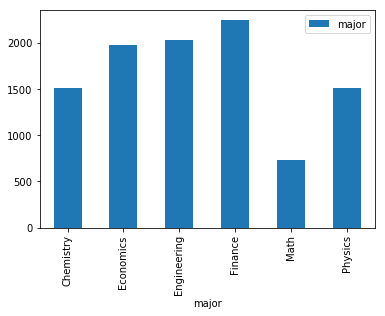

In [96]:
from matplotlib import pyplot as plt
way_better.groupby('major')[['major']].count().plot(kind='bar')
plt.show()